In [1]:
import numpy as np
import pandas as pd
import PyesianBlocks as pb
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('LightCurves/PKS0426-380_results.dat')
time = data[:, 0]
flux = data[:, 2]

In [3]:
flux_error = data[:, 3]
m = len(time)
uplims = np.zeros(m)

#Compute the upper limits if errors are zero
for i in range(m):
    if flux_error[i] == 0:
        flux_error == flux[i]
        uplims[i] = 1

In [4]:
#- Initialise the BB object
blocks = pb.BayesianBlocks(time, flux)

#- Gets the prior
blocks.get_prior()

#- Gets the likelihood
blocks.get_fitness()

#- Gets the CPs
blocks.get_changepoints()

A change point prior of 5.354210600806239 was obtained using a fp_rate of 0.05
Change points obtained
35 blocks were found


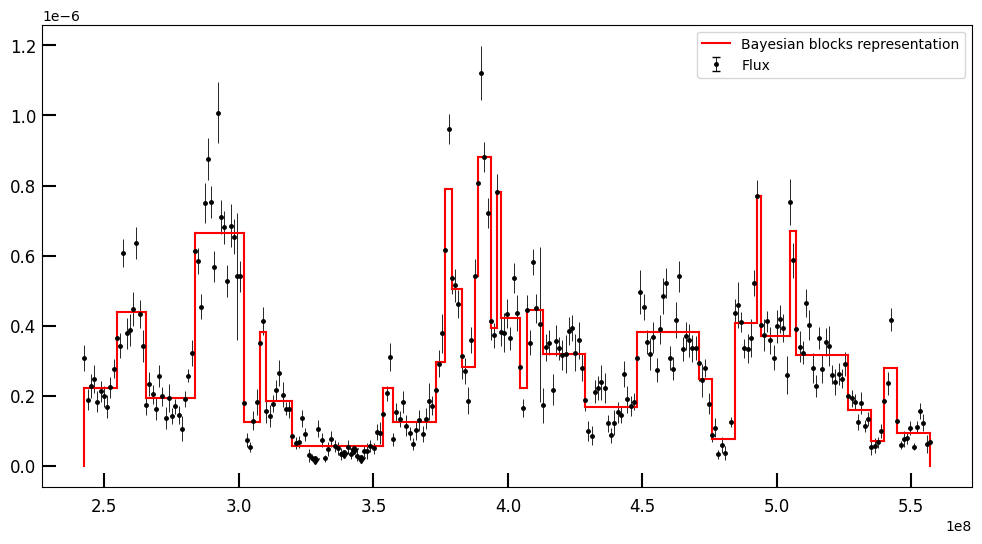

In [5]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.tick_params(labelsize=12, width=1.5, length=10, axis='x', which='major', direction='in', pad=8)
ax.tick_params(labelsize=12, width=1.5, length=10, axis='y', which='major', direction='in', pad=4)
ax.tick_params(labelsize=10, width=1.0, length=7, axis='both', which='minor', direction='in', pad=4)

ax.errorbar(time, flux, yerr=flux_error, fmt='ko', elinewidth=0.6, uplims=uplims, markersize=2.5, label='Flux')#

blocks.plot_blocks()
plt.legend()
plt.show()